In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten , Dense
from keras.utils import plot_model


In [12]:
mnist = tf.keras.datasets.mnist   #28*28 images of handwritten digits 0-9 

(x_train , y_train) , (x_test , y_test) = mnist.load_data()

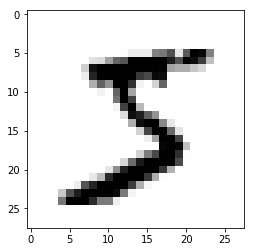

In [13]:
# Visualise data

index =0 #change index to see more data

plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()

# print(x_train[index]) # Uncomment to see pixel-values

In [4]:
x_train = normalize(x_train , axis=1)
x_test =  normalize(x_test , axis=1)

print(x_train.shape)

(60000, 28, 28)


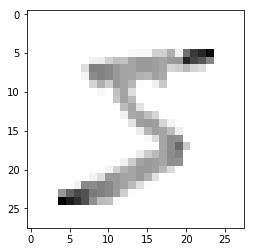

In [5]:
# Visualise data after normalization

index =0 #change index to see more data

plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()

# print(x_train[index]) # Uncomment to see pixel-values

In [6]:
# Created the architectue of the model
model = Sequential()
model.add(Flatten(input_shape=x_train[0].shape))
model.add(Dense(128 , activation=tf.nn.relu))
model.add(Dense(128 , activation=tf.nn.relu))
model.add(Dense(10 , activation=tf.nn.softmax))

# Compiled the model
model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',    # loss is sparse since target is integers NOT one-hot encodind
                 metrics=['accuracy'])


In [10]:
#Saving model details
model.summary()
plot_model(model, to_file='model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Trained model
model.fit(x_train , y_train , epochs=1)

Epoch 1/1
60000/60000 [==============================] - 6s 102us/step - loss: 0.2631 - acc: 0.9232


In [12]:
# Calculated validation loss and accuracy
val_loss , val_acc = model.evaluate(x_test , y_test)
print(val_loss , val_acc)

10000/10000 [==============================] - 0s 32us/step
0.1353648265324533 0.957


In [64]:
#Saved the weights of trained model for future use
model.save('mnist_reader.model')

(10000, 28, 28)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


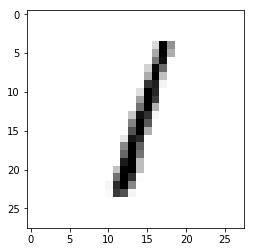